# Aprendizaje por árbol de decisiones #
Los clasificadores de **árbol de decisión** son modelos atractivos si nos preocupamos por la interpretabilidad. Como sugiere el nombre "árbol de decisión", podemos pensar en este modelo como un desglose de nuestros datos al tomar una decisión basada en una serie de preguntas.

![Árbol de Decisión](imgs/arbol_decision.png)

Según las características de nuestro conjunto de datos de capacitación, el modelo de árbol de decisión aprende una serie de preguntas para inferir las etiquetas de clase de los ejemplos.

Usando el algoritmo de decisión, se comienza en la raíz del árbol y se dividen los datos en la característica que resulta en la mayor **ganancia de información (IG)**. Mediante un proceso iterativo, se repetir este procedimiento de división en cada nodo hijo hasta que las hojas sean puras. Esto significa que los ejemplos de entrenamiento en cada nodo pertenecen a la misma clase. En la práctica, esto puede resultar en un árbol muy profundo con muchos nodos, lo que puede conducir fácilmente a un sobreajuste. Por lo tanto, normalmente se podará el árbol estableciendo un límite para la profundidad máxima del árbol.

## Maximizar IG ##
Para dividir los nodos en las características más informativas, se necesita definir una función objetivo que se pretende optimizar a través del algoritmo de aprendizaje de árbol. Aquí, la función objetivo es maximizar el IG en cada división, que definimos de la siguiente manera:

$$\begin{equation}IG(D_p,f) = I(D_p) - \sum_{j=1}^m \frac{N_j}{N_p}I(D_j)\end{equation}$$

Donde $f$ es la característica en la que realizar la partición, $D_p$ y $D_j$ son los conjuntos de datos del nodo padre y el nodo hijo $j$-esimo, $I$ es la medida de **impureza**, $N_p$ es el número total de ejemplos de entrenamiento en el nodo padre; y $N_j$ es el número de ejemplos en el nodo hijo $j$-esimo. Como se puede ver, la ganancia de información es simplemente la diferencia entre la impureza del nodo padre y la suma de las impurezas de los nodos hijos: cuanto menores son las impurezas de los nodos hijos, mayor es la ganancia de información. Para simplificar y reducir el espacio de búsqueda combinatoria, la mayoría de las bibliotecas (incluido scikit-learn) implementan árboles de decisión binarios. Esto significa que cada nodo padre se divide en dos nodos hijos $D_{dch}$ y $D_{izd}$:

$$\begin{equation}IG(D_p,f) = I(D_p) - \frac{N_{dch}}{N_p}I(D_{dch}) -\frac{N_{izd}}{N_p}I(D_{izd})\end{equation}$$

Las tres medidas de impurezas o criterios de división que se usan comúnmente en los árboles de decisión binarios son la **impureza de Gini** ($I_G$), la **entropía** ($I_H$) y el **error de clasificación** ($I_E$).

### Entropía $I_H$ ###
La entroía se define para una clase no vacía ($p\,(i|t)\neq 0$):

$$\begin{equation}I_H(t)= - \sum_{i=1}^c p\,(i|t) \log _2p\,(i|t)\end{equation}$$

Donde $p\,(i|t)$ es la proporción de los ejemplos que pertenecen a la clase $i$ para un nodo particular, $t$. La entropía es, por lo tanto, $0$ si todos los ejemplos en un nodo pertenecen a la misma clase, y es máxima si tenemos una distribución de clase uniforme. Por ejemplo, en una configuración de clase binaria, la entropía es $0$ si $p\,(i=1|t) = 0$ o $p\,(i=1|t) = 1$. Si las clases se distribuyen uniformemente con $p\,(i=1|t) = 0.5$ y $p\,(i=0|t) = 0.5$, la entropía es $1$. Por lo tanto, podemos decir que el criterio de entropía intenta maximizar la información mutua en el árbol.

### Impureza de Gini $I_G$ ###
La impureza de Gini puede entenderse como un criterio para minimizar la probabilidad de clasificación errónea:

$$\begin{equation} I_G(t) = - \sum_{i=1}^c  p\,(i|t)\big(1 - p\,(i|t)\big) = 1 - \sum_{i=1}^c p\,(i|t)^2\end{equation}$$

Al igual que la entropía, la impureza de Gini es máxima si las clases se mezclan perfectamente, por ejemplo, en un entorno de clase binaria (c = 2):

$$\begin{equation} I_G(t) = 1 - \sum_{i=1}^c 0.5^2 = 0.5\end{equation}$$

Sin embargo, en la práctica, tanto la impureza de Gini como la entropía generalmente producen resultados muy similares, y a menudo no vale la pena pasar mucho tiempo evaluando árboles usando diferentes criterios de impureza en lugar de experimentar con diferentes cortes de poda.

### Error de clasificación ###
Otra medida de impureza es el error de clasificación:

$$\begin{equation}I_E(t) = 1 - \max p\,(i|t)\end{equation}$$

Este es un criterio útil para la poda, pero no se recomienda para hacer crecer un árbol de decisión, ya que es menos sensible a los cambios en las probabilidades de clase de los nodos.

We can illustrate this by looking at the two possible splitting scenarios shown in the following figure:

![ejemplo árbol decision](imgs/ejm_arbol_decision.png)

Se comienza con un conjunto de datos, $D_p$, en el nodo padre, que consta de 40 ejemplos de la clase 1 y 40 ejemplos de la clase 2 que dividimos en dos conjuntos de datos, $D_{izq}$ y $D_{dch}$. La ganancia de información usando el error de clasificación como criterio de división sería la misma ($IG_E=0.25$) en ambos escenarios, A y B:

$$\begin{equation} I_E\big(D_p\big) = 1 - 0.5 = 0.5 \end{equation}$$

$$\begin{equation} A:\, I_E\big(D_{izq}\big) = 1 - \frac{3}{4} = 0.25 \end{equation}$$

$$\begin{equation} A:\, I_E\big(D_{dch}\big) = 1 - \frac{3}{4} = 0.25 \end{equation}$$

$$\begin{equation} A:\, IG_E = 0.5 - \frac{4}{8}\,0.25 - \frac{4}{8}\,0.25 = 0.25\end{equation}$$

$$\begin{equation} B:\, I_E\big(D_{izq}\big) = 1 - \frac{3}{6} = \frac{1}{3} \end{equation}$$

$$\begin{equation} B:\, I_E\big(D_{dch}\big) = 1 - 1 = 0 \end{equation}$$

$$\begin{equation} B:\, IG_E = 0.5 - \frac{6}{8}\times\frac{1}{3} - 0 = 0.25\end{equation}$$

Sin embargo, la impureza de Gini favorecería la división en el escenario B ($IG_G=0.1\overline{6}$) sobre el escenario A ($IG_G=0.125$), que de hecho es más puro:

$$\begin{equation} I_G\big(D_p\big) = 1 - \big(0.5^2 + 0.5^2\big) = 0.5 \end{equation}$$

$$\begin{equation} A:\, I_G\big(D_{izq}\big) = 1 - \Bigg(\bigg(\frac{3}{4}\bigg)^2 + \bigg(\frac{1}{4}\bigg)^2 \Bigg) = \frac{3}{8} = 0.375 \end{equation}$$

$$\begin{equation} A:\, I_G\big(D_{dch}\big) = 1 - \Bigg(\bigg(\frac{1}{4}\bigg)^2 + \bigg(\frac{3}{4}\bigg)^2 \Bigg) = \frac{3}{8} = 0.375 \end{equation}$$

$$\begin{equation} A:\, IG_G = 0.5 - \frac{4}{8}\,0.375 - \frac{4}{8}\,0.375 = 0.125\end{equation}$$

$$\begin{equation} B:\, I_G\big(D_{izq}\big) = 1 - \Bigg(\bigg(\frac{2}{6}\bigg)^2 + \bigg(\frac{4}{6}\bigg)^2 \Bigg) = \frac{4}{9} = 0.\overline{4} \end{equation}$$

$$\begin{equation} B:\, I_G\big(D_{dch}\big) = 1 - \big(1^2 + 0^2\big) =  0 \end{equation}$$

$$\begin{equation} B:\, IG_G = 0.5 - \frac{6}{8}\,0.\overline{4} - 0 = 0.1\overline{6}\end{equation}$$

Del mismo modo, el criterio de entropía también favorecería el escenario B ($IG_H=0.31$) sobre el escenario A ($IG_H=0.19$):

$$\begin{equation} I_H\big(D_p\big) = -\,\big(0.5\log_2(0.5) + 0.5\log_2(0.5)\big) = 1 \end{equation}$$

$$\begin{equation} A:\, I_H\big(D_{izq}\big) = -\, \Bigg(\frac{3}{4}\log_2\bigg(\frac{3}{4}\bigg) + \frac{1}{4}\log_2\bigg(\frac{1}{4}\bigg) \Bigg) =  0.81 \end{equation}$$

$$\begin{equation} A:\, I_H\big(D_{dch}\big) = -\, \Bigg(\frac{1}{4}\log_2\bigg(\frac{1}{4}\bigg) + \frac{3}{4}\log_2\bigg(\frac{3}{4}\bigg) \Bigg) =  0.81 \end{equation}$$

$$\begin{equation} A:\, IG_H = 1 - \frac{4}{8}\,0.81 - \frac{4}{8}\,0.81 = 0.19\end{equation}$$

$$\begin{equation} B:\, I_H\big(D_{izq}\big) = -\, \Bigg(\frac{2}{6}\log_2\bigg(\frac{2}{6}\bigg) + \frac{4}{6}\log_2\bigg(\frac{6}{6}\bigg) \Bigg) =  0.92 \end{equation}$$

$$\begin{equation} B:\, I_H\big(D_{dch}\big) = 0 \end{equation}$$

$$\begin{equation} B:\, IG_H = 1 - \frac{6}{8}\,0.92 - 0 = 0.31\end{equation}$$


Se traza los índices de impurezas para el rango de probabilidad [0, 1] para la clase 1. Hay que tener en cuenta que también se agrega una versión a escala de la entropía (entropía / 2) para observar que la impureza de Gini es una medida intermedia entre la entropía y la clasificación error.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


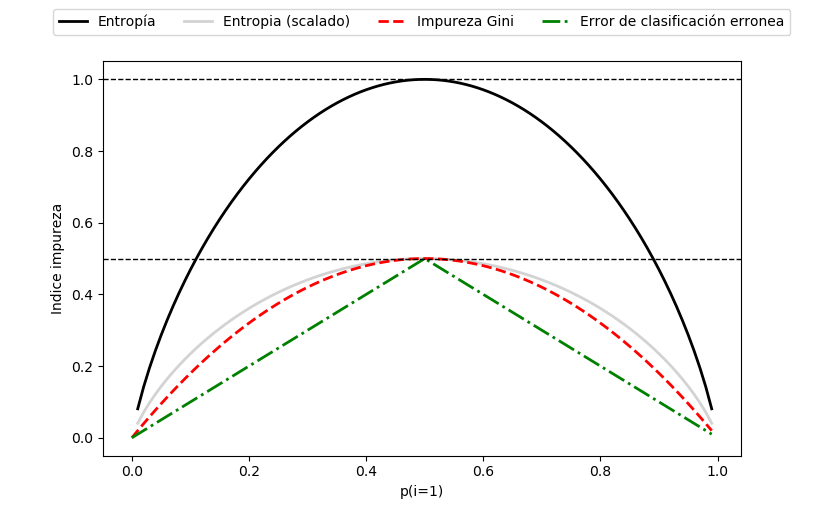

In [6]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropía', 'Entropia (scalado)', 
                          'Impureza Gini',
                          'Error de clasificación erronea'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray',
                           'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.xlabel('p(i=1)')
plt.xlabel('p(i=1)')
plt.ylabel('Indice impureza')
plt.show()

### Construcción de un árbol de decisión ###
Los árboles de decisión pueden construir límites de decisión complejos dividiendo el espacio de características en rectángulos. Sin embargo, se dbe tener cuidado ya que cuanto más profundo es el árbol de decisión, más complejo se vuelve el límite de decisión, lo que puede resultar fácilmente en un sobreajuste. Utilizando scikit-learn, se va a entrenar un árbol de decisión con una profundidad máxima de 4, utilizando la impureza de Gini como criterio para la impureza. Aunque puede ser deseable el ajuste de escala de características para fines de visualización, tenga en cuenta que el ajuste de escala de características no es un requisito para los algoritmos de árbol de decisión.

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from decisionregion import plot_decision_regions

In [8]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
from sklearn.tree import DecisionTreeClassifier

<IPython.core.display.Javascript object>


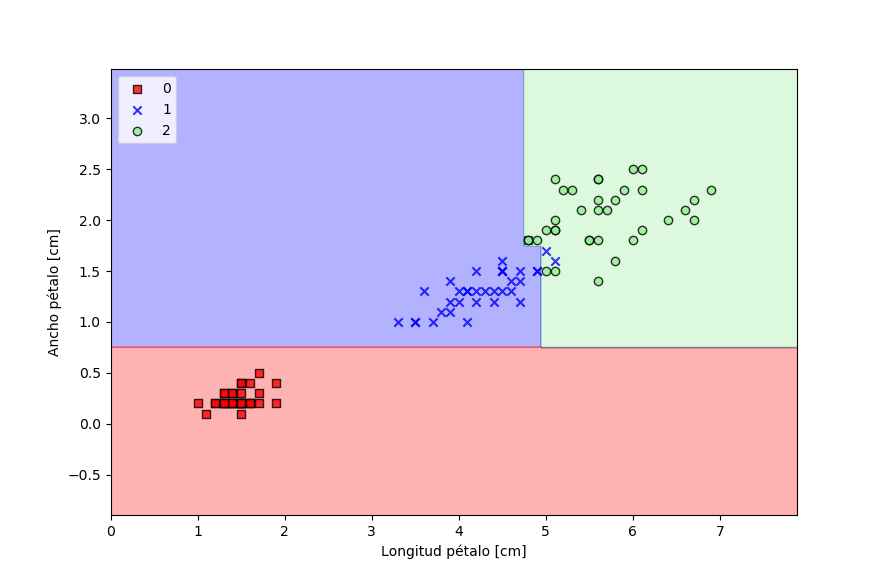

In [14]:
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_train,
                      y_train,
                      classifier=tree_model)#,
                      #test_idx=range(105, 150))
plt.xlabel('Longitud pétalo [cm]')
plt.ylabel('Ancho pétalo [cm]')
plt.legend(loc='upper left')
plt.show()

Una buena característica de scikit-learn es que nos permite visualizar fácilmente el modelo del árbol de decisión después del entrenamiento a través del siguiente código:

<IPython.core.display.Javascript object>


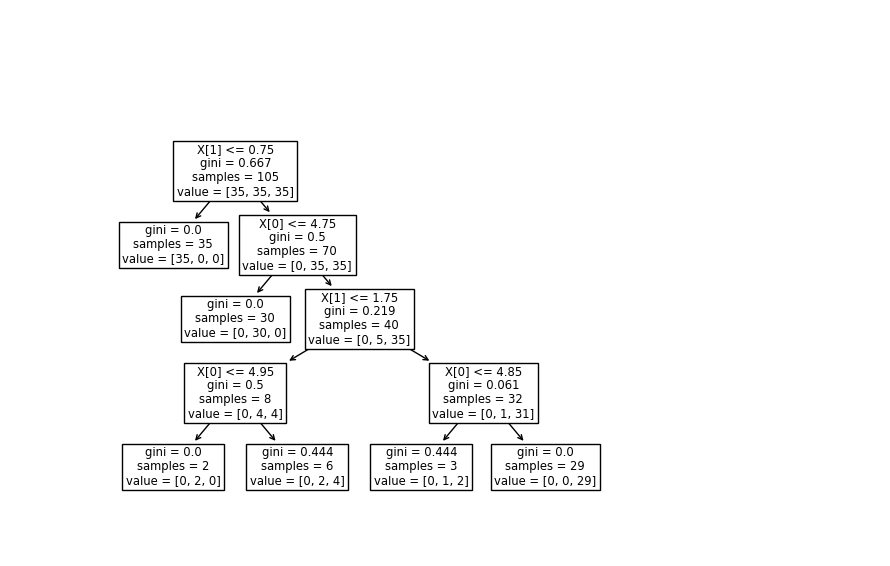

In [11]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

Mirando la figura del árbol de decisión, se parte con 105 ejemplos en la raíz y se dividen en dos nodos hijos con 35 y 70 ejemplos, utilizando el corte de ancho de pétalo $≤ 0,75$ cm. Después de la primera división, se puede ver que el nodo hijo izquierdo ya es puro y solo contiene ejemplos de la clase `Iris-setosa` (impureza de Gini = $0$). Las divisiones adicionales a la derecha se utilizan para separar los ejemplos de las clases `Iris-versicolor` e `Iris-virginica`.

## Combinación de varios árboles de decisión mediante bosques aleatorios ##
Los métodos de ensamblado han ganado una gran popularidad en las aplicaciones de aprendizaje automático durante la última década debido a su buen rendimiento de clasificación y robustez frente al sobreajuste. Un **bosque aleatorio** puede considerarse como un conjunto de árboles de decisión que es conocido por su buena escalabilidad y facilidad de uso. La idea detrás de un bosque aleatorio es promediar árboles de decisión múltiples (profundos) que sufren individualmente de una gran varianza para construir un modelo más robusto que tenga un mejor rendimiento de generalización y sea menos susceptible al sobreajuste. El algoritmo de bosque aleatorio se puede resumir en cuatro pasos simples:
1. Extraer una muestra aleatoria de bootstrap de tamaño $n$ (se elige aleatoriamente $n$ ejemplos del conjunto de datos de entrenamiento con reemplazo).
2. Construir un árbol de decisión a partir de la muestra de bootstrap. En cada nodo:
    1. Seleccionar aleatoriamente $d$ características sin reemplazo.
    2. Dividir el nodo utilizando la característica que proporciona la mejor división de acuerdo con la función objetivo, por ejemplo, maximizando la ganancia de información.
3. Repetir los pasos 1-2 $k$ veces.
4. Agregar la predicción por cada árbol para asignar la etiqueta de clase por **voto mayoritario**.

Se debe resaltar la ligera modificación que existe en el paso 2 con respecto a cuado cuando se está entrenando árboles de decisión individuales: en lugar de evaluar todas las características para determinar la mejor división en cada nodo, solo se considera un subconjunto aleatorio de esas.

> ##### Muestreo con remplazamiento #####
> En el muestreo aleatorio con reemplazo, siempre se devuelve el elemento extraido al conjunto original para que la probabilidad de sacar un elemento particular en cada turno no cambie; Se puede extraer el mismo elemento más de una vez. En otras palabras, en el muestreo con reemplazo, las muestras son independientes y tienen una covarianza de cero.

Aunque los bosques aleatorios no ofrecen el mismo nivel de interpretación que los árboles de decisión, una gran ventaja de los bosques aleatorios es que no hay que preocuparse tanto por elegir buenos valores de hiperparámetros. Por lo general, no se necesita podar el bosque aleatorio ya que el modelo de conjunto es bastante robusto al ruido de los árboles de decisión individuales. El único parámetro que realmente se debe ajustar en la práctica es la cantidad de árboles, $k$, (paso 3) que elegimos para el bosque aleatorio. Por lo general, cuanto mayor es el número de árboles, mejor es el rendimiento del clasificador de bosque aleatorio a expensas de un mayor costo computacional.

Otros hiperparámetros del clasificador de bosque aleatorio que se pueden optimizar son el tamaño, $n$, de la muestra bootstrap (paso 1) y el número de características, $d$, que se eligen aleatoriamente para cada división (paso 2.a), respectivamente. A través del tamaño de , $n$, de la muestra de bootstrap, se contrala el balance sesgo-varianza del bosque aleatorio.

Disminuir el tamaño de la muestra de bootstrap aumenta la diversidad entre los árboles individuales, ya que la probabilidad de que se incluya un ejemplo de entrenamiento particular en la muestra de arranque es menor, esto puede ayudar a reducir el efecto del sobreajuste. Sin embargo, las muestras de bootstrap más pequeñas generalmente dan como resultado un rendimiento general más bajo del bosque aleatorio y una diferencia pequeña entre el rendimiento del entrenamiento y del test, pero un rendimiento bajo del test general. Por el contrario, aumentar el tamaño de la muestra de bootstrap puede aumentar el grado de sobreajuste. Debido a que las muestras de bootstrap y, en consecuencia, los árboles de decisión individuales, se vuelven más similares entre sí, aprenden a ajustarse más al conjunto de datos de entrenamiento original.

En la mayoría de las implementaciones, incluida la implementación de `RandomForestClassifier` en scikit-learn, el tamaño de la muestra bootstrap se elige para que sea igual al número de ejemplos de entrenamiento en el conjunto de datos de entrenamiento original, que generalmente proporciona un buen balance sesgo-varianza. Para el número de características, $d$, en cada división, se pretende elegir un valor que sea menor que el número total de características en el conjunto de datos de entrenamiento. Un valor predeterminado razonable que se usa en scikit-learn y otras implementaciones es $d=\sqrt{m}$, donde $m$ es el número de características en el conjunto de datos de entrenamiento.

<IPython.core.display.Javascript object>


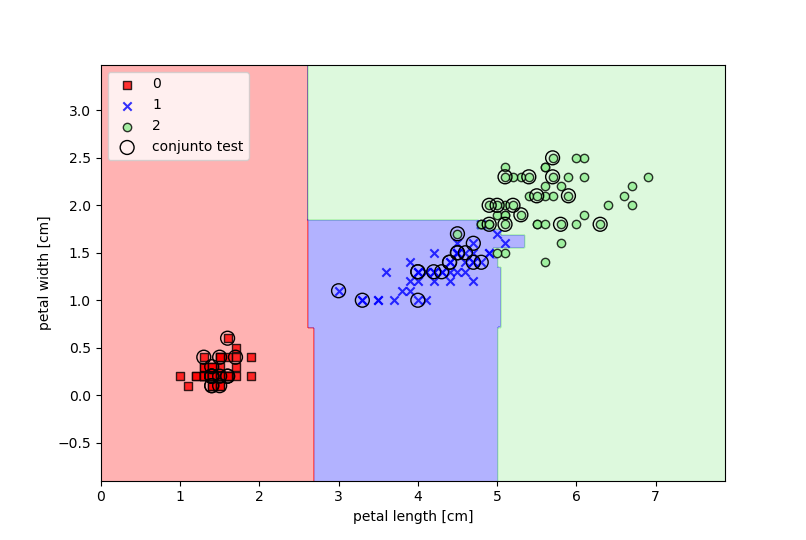

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

En el código anterior, se entreba un bosque aleatorio de 25 árboles de decisión mediante el parámetro `n_estimators` y usamos la medida de impureza de Gini como criterio para dividir los nodos. Aunque se esta creando un bosque aleatorio muy pequeño a partir de un conjunto de datos de entrenamiento muy pequeño, utilizamos el parámetro `n_jobs` para fines de demostración, lo que nos permite paralelizar el modelo de entrenamiento usando múltiples núcleos de nuestra computadora (aquí, dos núcleos).